# AO3 Project
## Tags Assessment


### Introduction
___

This document will contain analysis of the AO3 tags. We start by looking at the most common fiction tags. 

In [98]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Top Tags looks at tags that have been used at least 5000 times.
top_tags = pd.read_csv("top_tags.csv")

# We then create a count of our Top Tags
tag_usage = top_tags["tagId"].value_counts().to_frame("Total Uses").reset_index()
for iden in tag_usage["tagId"]:
    tags = tag_usage[tag_usage["tagId"] == iden].reset_index()
    off_ind = tags.loc[0, "index"]
    
    tag_ind = top_tags[top_tags["tagId"] == iden].reset_index()
    tag_name = tag_ind.loc[0, "name"]
    tag_type = tag_ind.loc[0, "type"]
   
    tag_usage.loc[off_ind, "Tag Name"] = tag_name
    tag_usage.loc[off_ind, "Tag Type"] = tag_type

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import os

# This bit creates a csv of the Data Frame from the above code

# DO NOT RUN! 

try:
    os.remove('top_tags_names.csv')
except:
    pass

tag_usage.to_csv('top_tags_names.csv')
print('done')

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Top Tags looks at tags that have been used at least 5000 times.
top_tags = pd.read_csv("top_tags.csv")
tag_usage = pd.read_csv("top_tags_names.csv")

# Graphing our Series

top_50 = tag_usage[:50]
top_10 = tag_usage[:15]

#plt.bar(top_50["tagId"].tolist(), top_50["Total Uses"].tolist())
def plot_name(df):
    df.plot(kind="bar",
               y = "Total Uses")
    plt.xticks(df.index.to_list(), df["Tag Name"].tolist())
    plt.show()

plot_name(top_50)
plot_name(top_10)

# Top 50 Tag Type

tag_type = top_50["Tag Type"].value_counts().to_frame().reset_index()
tag_type.plot(kind = "bar")

plt.xticks(tag_type.index.to_list(), tag_type["Tag Type"].tolist())
plt.show()

We see that in the top 50 tags, there are no actual relationship tags. This was actually quite surprising to me, as people tend to assume fanfiction is smut, meaning that its typically erotic writing about two characters. We also can find that the most common tags labeled in our generic category appear to be genres. So despite AO3 not having specific genre tags, they are among the most used tags. 

We also see that from the start of the site until July 2020, the top ten most popular fandoms are as follows.

In [ ]:
fandoms = tag_usage.copy(deep=True)
fandoms = fandoms[fandoms["Tag Type"] == "fandom"].reset_index()
fan_10 = fandoms[:20]
print(fan_10)

fan_10.plot(kind="bar",
           y = "Total Uses")
plt.xticks(fan_10.index.to_list(), fan_10["Tag Name"].tolist())
plt.show()

We see that in the ten most popular fandoms, eight involve fictional universes and characters. However, the fifth most popular fandom is BTS, a real k-pop group. This shows us there are a significant amount of works that include real life celebrities as characters, rather than just fictional individuals.

Though it barely made it in the top 10, we also see that Original Works are very common. An original work is just as it sounds, a piece not based on any fictional or real group, and instead centers an author's unique story. This is very interesting since fanfiction sites are seen as full of works that are not publishable due to copyright. However, many works tag themselves with their own universe. 


We now focus on the most popular tags within each fandom. Are there similarities; differences?

In [ ]:
# Now we go through the same sorting as earlier:
def sort_tags(df):
    tag_count = df["tagId"].value_counts().to_frame("Total Uses").reset_index()
    for iden in tag_count["tagId"]:
        tags = tag_count[tag_count["tagId"] == iden].reset_index()
        #print(tags)
        off_ind = tags.loc[0, "index"]
        
        tag_ind = df[df["tagId"] == iden].reset_index()
        tag_name = tag_ind.loc[0, "name"]
        tag_type = tag_ind.loc[0, "type"]
        
        tag_count.loc[off_ind, "Tag Name"] = tag_name
        tag_count.loc[off_ind, "Tag Type"] = tag_type
       
    return tag_count 
        

# In order to look at the most popular tags in each fandom, we need 
# find only works for each of the fandoms. This requires us to go back to top_tags

# for tag in fan_10["tagId"].tolist():
for tag in fan_10["tagId"].tolist():
    
    story_fan = top_tags[top_tags["tagId"] == tag]
    story_fan = story_fan["storyId"].tolist() 
# Help with isin: https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
    fan_assess = top_tags["storyId"].isin(story_fan)
    fan_all = top_tags[fan_assess]
    fan_all = sort_tags(fan_all)
    
    top_fan = fan_all[:50]
    print(top_fan)
    
    plot_name(top_fan)

As we see from graphing the top tags of each fandom, most of the tags are major characters. Since we want to focus on the top types of stories, I'm going to remove characters and relationships, so we can see if fandoms have similar story genres and content. 

In [ ]:
def remove_char_rel(df):
    new_df = df.copy(deep= True)
    new_df = new_df[new_df["Tag Type"] != "relationship"]
    new_df = new_df[new_df["Tag Type"] != "character"]
    new_df = new_df[new_df["Tag Type"] != "fandom"]
    new_df = new_df.reset_index()
    return new_df


fan_tags_list = []
    
for tag in fan_10["tagId"].tolist():
    
    story_fan = top_tags[top_tags["tagId"] == tag]
    story_fan = story_fan["storyId"].tolist() 
# Help with isin: https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
    fan_assess = top_tags["storyId"].isin(story_fan)
    fan_all = top_tags[fan_assess]
    fan_all = sort_tags(fan_all)
    #no_ships = remove_char_rel(fan_all)
    no_ships = fan_all[:40]
    fan_tags_list.append(no_ships)
    plot_name(no_ships)

We now have graphs of the top 40 tags for each of the fandoms with the highest number of works. A reminder that currently, we are not focusing on the popularity. a lot of data for the 20want to see what tags each fandom has in common

In [ ]:
pop_tags = { }

for fandom in fan_tags_list:
    for tag in fandom["tagId"]:
        if tag in pop_tags:
            pop_tags[tag] += 1
        else:
            pop_tags[tag] = 1


pop_tags_df = pd.DataFrame({
    "tagId": pop_tags.keys(),
    "Total Uses": pop_tags.values()
})

for iden in pop_tags_df["tagId"]:
    tags = pop_tags_df[pop_tags_df["tagId"] == iden].reset_index()
    off_ind = tags.loc[0, "index"]
    
    tag_ind = top_tags[top_tags["tagId"] == iden].reset_index()
    tag_name = tag_ind.loc[0, "name"]
    tag_type = tag_ind.loc[0, "type"]
   
    pop_tags_df.loc[off_ind, "Tag Name"] = tag_name
    pop_tags_df.loc[off_ind, "Tag Type"] = tag_type

pop_tags_df = pop_tags_df.sort_values("Total Uses", ascending=False).reset_index()
pop_tags_df


In [ ]:
top_30 = pop_tags_df.iloc[:20]

plot_name(top_30)

So we have found that all 20 fandoms had 13 of the same tags in the top 40. The thirteen are "No Warnings...", "Fluff", "M/M", graphic depictions of violance,  angst, romance, gen "no warnings, and F/M. Three of these 20 tags deal with explicit content, meaning of This is similar to what we found with age rating - namely, explicit works are very common, in almost half of the top twenty fandoms. 

In [ ]:
type_tags = top_30["Tag Type"].value_counts().reset_index()
type_tags
# df.plot(kind="bar",
#                y = "Total Uses")
#     plt.xticks(df.index.to_list(), df["Tag Name"].tolist())
#     plt.show()

We see here that a majority of the most popular tags are generic. Looking back at our graph, out of the 20 tags most commonly used in the top 20 fandoms, all include the relationship dynamics - "M/M, F/M, F/F, Multi, Gen. 5 are what I would call genres, 6 are warnings, 


---
Goal - with regards to kudos, find the top 5000 works, and the tags within those works. Are there tags that pop up often? If we wanted to create a work with high kudos, what tags would we want to include?


In [ ]:
num_data = pd.read_csv("not_reduced_project_info.csv")
num_data = num_data.sort_values("kudos", ascending = False).reset_index()

The y axis above is in terms of millions of uses.  

In [ ]:
top_num_data = num_data.iloc[:10000]
top_stories = top_num_data["id"].tolist()
top_stories
#for story in top_stories:
all_tags = pd.read_csv("tag_data.csv")
    
print(all_tags)

In [ ]:
pop_story_tags1 = all_tags[all_tags["storyId"].isin(top_stories)]

pop_story_tags = pop_story_tags1["tagId"].value_counts().to_frame("Total Uses").reset_index()

top_pop_tags = pop_story_tags.iloc[:500]


for iden in top_pop_tags["tagId"]:

    tags = top_pop_tags[top_pop_tags["tagId"] == iden].reset_index()
    off_ind = tags.loc[0, "index"]
    tag_ind = pop_story_tags1.copy(deep=True)
    tag_ind = tag_ind[tag_ind["tagId"] == iden].reset_index()
    tag_name = tag_ind.loc[0, "name"]
   
    top_pop_tags.loc[off_ind, "Tag Name"] = tag_name

top_pop_tags                                          

Want to look at a couple of the top tags. See how their usage or lack of use is correlated to kudos. Make columns for each of these tags with values of 0 or 1.

In [ ]:
import os

# This bit creates a csv of the Data Frame from the above code

# DO NOT RUN! 

try:
    os.remove('all_pop_tags.csv')
except:
    pass

top_pop_tags.to_csv('all_pop_tags.csv')
print('done')

In [ ]:
top_pop_tags = pd.read_csv("all_pop_tags.csv")

print(top_pop_tags)

# These are tags and their uses in the top 

In [ ]:
top_top_30 = top_pop_tags[:10]
print(top_top_30)
plot_name(top_top_30)

# sort so we only have these top tags.

top_tier_tags = top_top_30["tagId"].tolist()

#top_pop_tags
get_story_id = pop_story_tags1[pop_story_tags1["tagId"].isin(top_tier_tags)].reset_index()

top_num_data = top_num_data[top_num_data["id"].isin(get_story_id["storyId"]).tolist()]
print(top_num_data)
get_story_id
num_data_copy = top_num_data.copy(deep=True)
num_data_copy = num_data_copy[["id", "kudos"]]
print(num_data_copy)
lists = ["tag17", "tag1", "tag9", "tag121", "tag2085", "tag38", "tag20952", "tag1461", "tag1462", "tag20991"]
count = 0

for tags in top_tier_tags:
    col = lists[count]
    only_tags = get_story_id[get_story_id["tagId"] == tags]
    print(only_tags)
    count += 1
    for story in num_data_copy["id"]:
        new_data = num_data_copy.copy(deep=True)
        if story in only_tags["storyId"].tolist():
            index = new_data[new_data["id"] == story].index.tolist()[0]
            num_data_copy.loc[index, col] = 1
        else:
            index = new_data[new_data["id"]== story].index.tolist()[0]
            num_data_copy.loc[index, col] = 0
print(only_tags["storyId"])
        

num_data_copy
#for story in get_story_id["storyId"].tolist():
    
    #only_story = get_story_id[get_story_id["storyID"] == story]
    

Now that we have a matrix, we can compare and see if there's any correlation.

In [ ]:
import os

# This bit creates a csv of the Data Frame from the above code

# DO NOT RUN! 

try:
    os.remove('corr_kudos.csv')
except:
    pass

num_data_copy.to_csv('corr_kudos.csv')
print('done')

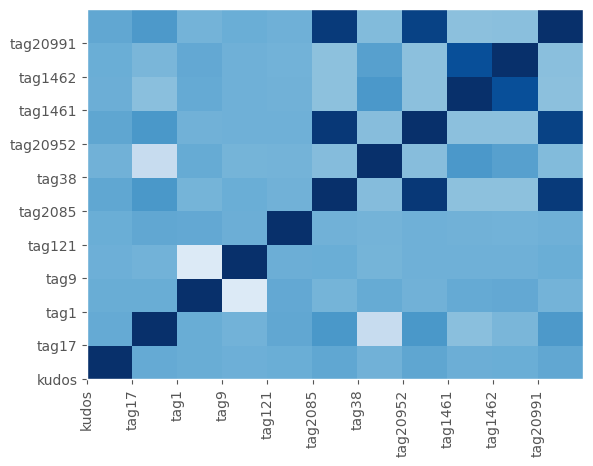

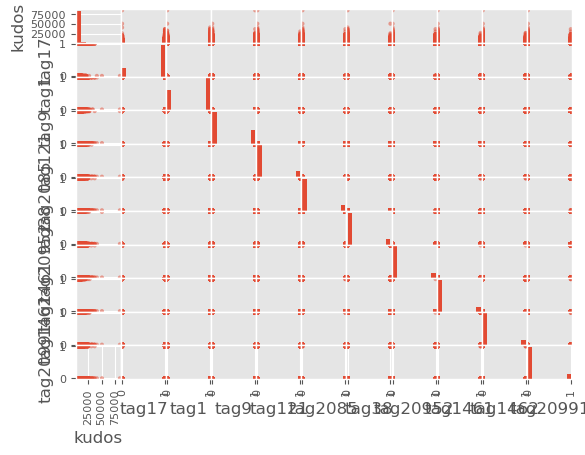

,kudos,tag17,tag1,tag9,tag121,tag2085,tag38,tag20952,tag1461,tag1462,tag20991
kudos,1.000000,0.036275,0.011898,-0.010403,0.001388,0.065122,-0.024369,0.076865,-0.002340,0.003846,0.059342
tag17,0.036275,1.000000,0.012198,-0.034232,0.055340,0.197904,-0.510283,0.196261,-0.151215,-0.074655,0.181207
tag1,0.011898,0.012198,1.000000,-0.728754,0.050557,-0.048025,0.029206,-0.025630,0.033773,0.049000,-0.039751
tag9,-0.010403,-0.034232,-0.728754,1.000000,-0.005623,0.006010,-0.050154,-0.015885,-0.018049,-0.016092,0.003670
tag121,0.001388,0.055340,0.050557,-0.005623,1.000000,-0.027576,-0.044969,-0.019966,-0.024278,-0.035593,-0.017100
tag2085,0.065122,0.197904,-0.048025,0.006010,-0.027576,1.000000,-0.129235,0.937104,-0.169657,-0.169143,0.919904
tag38,-0.024369,-0.510283,0.029206,-0.050154,-0.044969,-0.129235,1.000000,-0.137007,0.192588,0.120956,-0.115088
tag20952,0.076865,0.196261,-0.025630,-0.015885,-0.019966,0.937104,-0.137007,1.000000,-0.161251,-0.160770,0.864624
tag1461,-0.002340,-0.151215,0.033773,-0.018049,-0.024278,-0.169657,0.192588,-0.161251,1.000000,0.760938,-0.156439
tag1462,0.003846,-0.074655,0.049000,-0.016092,-0.035593,-0.169143,0.120956,-0.160770,0.760938,1.000000,-0.155963


In [100]:
num_data_stuff = pd.read_csv("corr_kudos.csv")


corr_data = num_data_stuff.copy(deep=True)
corr_data = corr_data[corr_data.columns[corr_data.columns.isin(["id", "kudos","tag17", "tag1", "tag9", "tag121", "tag2085", "tag38", "tag20952", "tag1461", "tag1462", "tag20991"])]]

corr_data = corr_data.drop(["id"], axis =1)

corred_data = corr_data.corr()
heatmap = plt.pcolor(corred_data, cmap=plt.cm.Blues, vmin=-1, vmax=1)
plt.xticks(ticks=range(0,11),labels=corred_data.columns,  rotation=90)
plt.yticks(ticks=range(0,11),labels=corred_data.columns)

# Using technique like Noble to label.
plt.show()
pd.plotting.scatter_matrix(corr_data)
plt.show()
corred_data

So we see that some of the tags are highly correlated to other tags, but they are only slightly correlated to kudos. OUr top correlated tags are tag2085, tag30952, and tag20991. Let us change the names of these columns again.


In [73]:
for entry in corr_data.columns:
    print(corr_data[entry].value_counts())

kudos
3599.0    14
3649.0    13
3762.0    12
3402.0    12
3671.0    11
          ..
6978.0     1
6975.0     1
6967.0     1
6966.0     1
5684.0     1
Name: count, Length: 4333, dtype: int64
tag17
1.0    9871
0.0       1
Name: count, dtype: int64
tag1
1.0    9871
0.0       1
Name: count, dtype: int64
tag9
1.0    9871
0.0       1
Name: count, dtype: int64
tag121
1.0    9871
0.0       1
Name: count, dtype: int64
tag2085
1.0    9871
0.0       1
Name: count, dtype: int64
tag38
1.0    9871
0.0       1
Name: count, dtype: int64
tag20952
1.0    9871
0.0       1
Name: count, dtype: int64
tag1461
1.0    9871
0.0       1
Name: count, dtype: int64
tag1462
1.0    9871
0.0       1
Name: count, dtype: int64
tag20991
1.0    9871
0.0       1
Name: count, dtype: int64


In the top 10,000 works, we see that many of the most popular works have a lot in common. Namely, out of the 10,000 works with the top kudos, almost 8,000 feature M/M couples. Now, as has been pointed out, that does not necessarily mean that the romance is the center of the fanfic, but it does mean that people liked books that featured. 

If we wanted something that is sure to be liked by a lot of people prior to mid 2020, we should create a work where no archive warnings apply, m/m, fluff, teen wolf. Now make modeling showing that
